In [194]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import scipy.stats as sps

Text(15, -9, 'Nessuno')

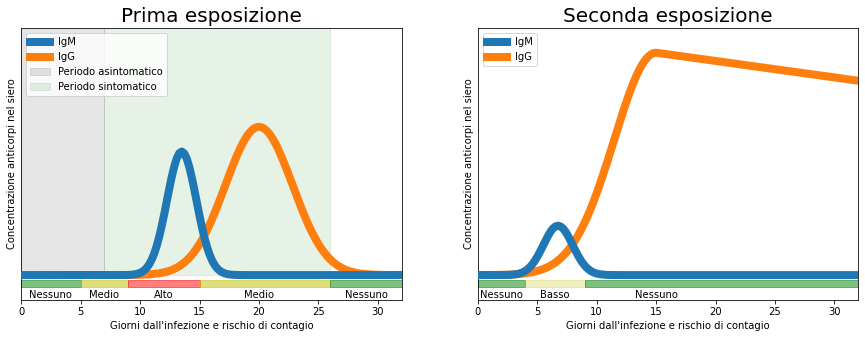

In [288]:
def gaussian(x, a, b, c):
    d = - ((x - b) ** 2)
    return a * np.exp( d / (c ** 2) )

def line(x, x1, x2, y1, y2):
    return (x - x1) * ( (y2 - y1) / (x2 - x1) ) + y1

desease_a = 7
desease_z = desease_a + 19
igM_m_day = (12+15)/2
igM_m_lev = 50
igM2_m_day = (12+15)/4
igM2_m_lev = 30/1.5
igG_m_day = 20
igG_m_lev = 60
igG2_m_day = 15
igG2_m_lev = 60*1.5

x = np.linspace(0, 42, 200)
IgM = gaussian(x, igM_m_lev, igM_m_day, 1.75)
IgG = gaussian(x, igG_m_lev, igG_m_day, 4)
IgM2 = gaussian(x, igM2_m_lev, igM2_m_day, 1.75)
IgG2a = gaussian(x[np.where(x<igG2_m_day)], igG2_m_lev, igG2_m_day, 5)
IgG2b = line(x[np.where(x>=igG2_m_day)], igG2_m_day, x[-1], IgG2a[-1], IgG2a[-1]/1.25)
IgG2 = np.concatenate((IgG2a, IgG2b))


ylim = 100
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# prima
ax[0].fill_betweenx([0,ylim], 0, desease_a, color="k", alpha=.1, label="Periodo asintomatico")
ax[0].fill_betweenx([0,ylim], desease_a, desease_z, color="g", alpha=.1, label="Periodo sintomatico")
#ax[0].axvline(igM_m_day, ls=":", c=colors[0])
ax[0].plot(x, IgM, lw=8, c=colors[0], zorder=3, label="IgM")
#ax[0].axvline(igG_m_day, ls=":", c=colors[1])
ax[0].plot(x, IgG, c=colors[1], lw=8, label="IgG")
ax[0].set_ylim(-10, ylim)
ax[0].set_yticks([])
ax[0].set_ylabel("Concentrazione anticorpi nel siero")
ax[0].set_xlim(0, 32)
ax[0].set_xlabel("Giorni dall'infezione e rischio di contagio")
rect1 = patches.Rectangle((0,-5),5,3,linewidth=1,edgecolor='g',facecolor='g',alpha=.5)
ax[0].add_patch(rect1)
rect2 = patches.Rectangle((5,-5),4,3,linewidth=1,edgecolor='y',facecolor='y',alpha=.5)
ax[0].add_patch(rect2)
rect3 = patches.Rectangle((9,-5),6,3,linewidth=1,edgecolor='r',facecolor='r',alpha=.5)
ax[0].add_patch(rect3)
rect4 = patches.Rectangle((15,-5),11,3,linewidth=1,edgecolor='y',facecolor='y',alpha=.5)
ax[0].add_patch(rect4)
rect5 = patches.Rectangle((26,-5),10,3,linewidth=1,edgecolor='g',facecolor='g',alpha=.5)
ax[0].add_patch(rect5)
ax[0].legend(loc="upper left")
ax[0].set_title("Prima esposizione", fontsize=20)
ax[0].text(2.5, -9, r"Nessuno", ha="center")
ax[0].text(7, -9, r"Medio", ha="center")
ax[0].text(12, -9, r"Alto", ha="center")
ax[0].text(20, -9, r"Medio", ha="center")
ax[0].text(29, -9, r"Nessuno", ha="center")

# seconda
#ax[1].axvline(igM2_m_day, ls=":", c=colors[0])
ax[1].plot(x, IgM2, lw=8, c=colors[0], zorder=3, label="IgM")
#ax[1].axvline(igG2_m_day, ls=":", c=colors[1])
ax[1].plot(x, IgG2, c=colors[1], lw=8, label="IgG")
ax[1].set_ylim(-10, ylim)
ax[1].set_yticks([])
ax[1].set_ylabel("Concentrazione anticorpi nel siero")
ax[1].set_xlim(0, 32)
ax[1].set_xlabel("Giorni dall'infezione e rischio di contagio")
ax[1].legend(loc="upper left")
ax[1].set_title("Seconda esposizione", fontsize=20)
rect1 = patches.Rectangle((0,-5),4,3,linewidth=1,edgecolor='g',facecolor='g',alpha=.5)
ax[1].add_patch(rect1)
rect2 = patches.Rectangle((4,-5),5,3,linewidth=1,edgecolor='y',facecolor='y',alpha=.25)
ax[1].add_patch(rect2)
rect3 = patches.Rectangle((9,-5),30,3,linewidth=1,edgecolor='g',facecolor='g',alpha=.5)
ax[1].add_patch(rect3)
ax[1].text(2, -9, r"Nessuno", ha="center")
ax[1].text(6.5, -9, r"Basso", ha="center")
ax[1].text(15, -9, r"Nessuno", ha="center")